# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 8</center>

# <center>Non-Linear Regression</center>

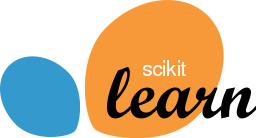

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Polynomial regression to implement non-linear models. Use regularization concepts to overcome overfitting problem in machine learning.

By the end of the lab, you should be able to :
- Differentiate overfitting and underfitting issues in machine learning.


- Implement polynomial features to apply non-linear models and overcome underfitted models.


- Implment regularization to overcome overfitted models.




## <font color = blue>1. Loading Data

    - Lets load boston housing data set for this problem.
    

In [39]:
#import libraries first
from sklearn import datasets
import pandas as pd


In [40]:
#Load datasets
boston = datasets.load_boston()
boston.keys()


C:\Users\LAB1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## <font color = blue> 2. Train test split


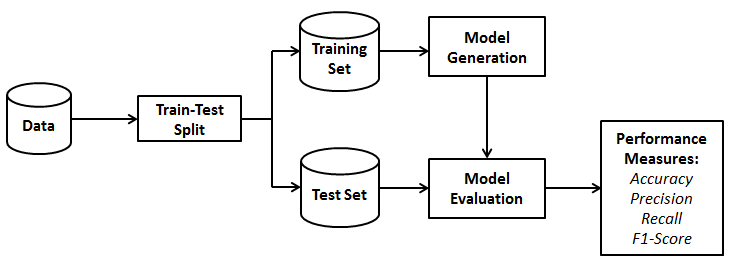

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`


### <font color = "7DCE13">To simplify the model and to visualize data distribution in two dimensional space, lets consider only one feature first.

In [63]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
bdf = pd.DataFrame(data=boston.data, columns=boston.feature_names)
x = bdf[['LSTAT']]
y = boston.target

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)


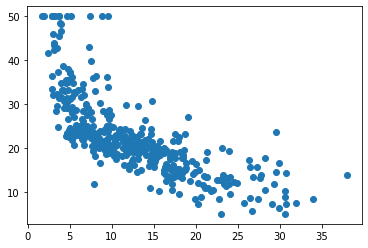

In [42]:
#Lets plot scatter plot to check relation in two dimensional space.
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()


## <font color=blue> 3. Train Simple Linear Model    

### <font color="green"> 3.1. Create and Train model 
    
- Lets create simple Linear Regression model

In [43]:
#create model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)
#train the model by fitting data


LinearRegression()

### <font color="green"> 3.2. Test Model 
- Testing or evaluating a machine learning model is a crucial step in machine workflow. It allows machine learning engineer to discover underfitting and overfitting problem in the trained model.


In [67]:
#lets find predicted value for trained data
y_hat = lr.predict(x_train)
y_hat


C:\Users\LAB1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.89337179, 31.77671085, 14.66919933, 25.97622584, 14.97294094,
       31.67872968, 27.59291507, 22.48809634, 27.83786799, 23.45810988,
       18.09854013, 26.43673732, 17.50085502,  7.63415164, 21.17514873,
       16.45245654, 18.11813636, 22.62526998, 25.77046539, 28.53353426,
       28.259187  , 22.69385679, 26.61310342, 27.35776028, 21.91980558,
       17.3146908 , 24.78085562, 31.96287506, 32.9916773 , 24.58489329,
       13.20927996, 16.78559251, 14.21848597, 22.3999133 , 17.09913224,
        7.16384204, 28.27878323, 30.27759901, 23.38952307, 20.1561446 ,
       23.41891742, 25.10419347, 28.38656251, 26.17218817, 29.99345363,
       21.9883924 , 22.85062666, 30.00325175, 13.98333117, 31.97267318,
       11.37703216, 13.78736884, 27.28917346, 30.16002161, 17.17751717,
       29.09202691, 31.99226941, 28.64131355, 17.7850004 , 30.40497453,
        4.68491855, 30.37558018, 29.18020996, 19.43108398, 20.36190505,
       12.07269844, 29.48395157, 27.89665669, 23.8794289 , 20.51

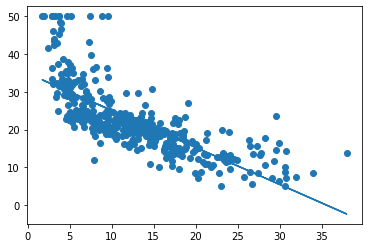

In [68]:
#lets plot prediction line
import numpy as np
plt.scatter(x_train, y_train)
x_train = np.array(x_train).reshape(-1,1)
plt.plot(x_train, y_hat)
plt.show()

In [47]:
#Lets check model's r2 score for train data
lr.score(x_train, y_train)



0.552301990803739

In [48]:
# lets ckeck model's r2 score for test data
lr.score(x_test, y_test)



0.5041523728903132

### <font color = "7DCE13"> Problem: We noticed that both models' train accuracy, as well as test accuracy, is very low. Such a situation is also called High Bias or Underfitting. 
    
### <font color = "7DCE13"> Underfitting occurs when the model fails to capture the relationship between input and output features due to a lack of enough features to capture the pattern.
    
### <font color = "7DCE13"> Solution?
    - Increase Number of Features
    
    - Increase Model's Complexity(Apply polynomial Features)


## <font color=blue> 4. Train Non-Linear Model (Polynomial regression)   

### <font color="green"> 4.1. Create Polynomial Features 


In [55]:

#create PolynomialFeatures Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_train_poly

array([[  1.    ,  18.35  , 336.7225],
       [  1.    ,   3.16  ,   9.9856],
       [  1.    ,  20.62  , 425.1844],
       ...,
       [  1.    ,  17.6   , 309.76  ],
       [  1.    ,  10.97  , 120.3409],
       [  1.    ,   5.57  ,  31.0249]])

### <font color="green"> 4.2. Train Non-linear Model (Polynomial Regression)


In [56]:
#lets create model first
polylr = LinearRegression()


#train the model
polylr.fit(x_train_poly,y_train)





LinearRegression()

### <font color="green"> 4.3. Test Non-Linear Model 


In [57]:
#find Predicted value for non-linear Model
y_hat_poly = polylr.predict(x_train_poly)




In [72]:
#I want to plot prediction line for non-linear model. Lets create dataframe out of POlynomial Features
#Lets add dummy features names
# plt.scatter(x_train, y_train)
# plt.plot(x_train, y_hat_poly)
# plt.show()
x_train_df = pd.DataFrame(x_train_poly, columns=['x0', 'x1', 'x3'])
x_train_df.head()

poly_df = pd.DataFrame(x_train_poly, columns=['x0', 'x1', 'x3'])
poly_df.head()

x0     x1        x3
0  1.0  18.35  336.7225
1  1.0   3.16    9.9856
2  1.0  20.62  425.1844
3  1.0   9.08   82.4464
4  1.0  20.31  412.4961

In [74]:
#Lets add predicted output as new col in the dataframe
poly_df['y_hat_poly'] = y_hat_poly
poly_df.head()



x0     x1        x3  y_hat_poly
0  1.0  18.35  336.7225   14.634625
1  1.0   3.16    9.9856   35.977733
2  1.0  20.62  425.1844   13.229071
3  1.0   9.08   82.4464   25.189558
4  1.0  20.31  412.4961   13.393670

In [75]:
#LEts sort the dataframe to get continuous prediction line
poly_df.sort_values(by=['x1'], inplace=True)
poly_df.head()


x0    x1      x3  y_hat_poly
84   1.0  1.73  2.9929   39.056747
28   1.0  1.92  3.6864   38.637043
307  1.0  2.47  6.1009   37.440429
213  1.0  2.87  8.2369   36.587268
386  1.0  2.88  8.2944   36.566124

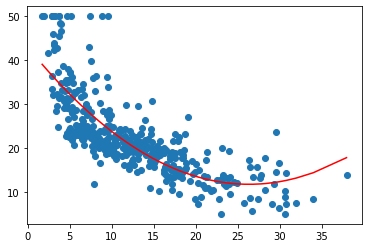

In [76]:
#lets plot the prediction line
plt.scatter(x_train, y_train)
plt.plot(poly_df.x1,poly_df['y_hat_poly'], color='red')
plt.show()


In [85]:
#Lets check train score
polylr.score(x_train_poly,y_train)


0.6411591817537179

In [86]:
#Lets Check Test Score
polylr.score(x_test_poly, y_test)


0.6368350327760268

### <font color = "7DCE13"> Takeaway: We noticed that model performance is better than Simple Linear Model. In other word, model performance is improving as we increase model's complexity. Lets try adding more features.
    


## <font color = blue>5. Increasing Features
    
   - Lets choose all the Features availabe in boston housing dataset and add non-linear model with 2 degree polynomial features.


### <font color="green"> 5.1. Add more features


In [88]:
#Lets create new X, y remains same
xm = bdf
y = boston.target




### <font color="green"> 5.2. Split new data for train and test


In [89]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, y, test_size=0.2, random_state=5)


### <font color="green"> 5.3. Apply Polynomial Features to new features


In [90]:
#create PolynomialFeatures Features
polym = PolynomialFeatures(degree =2)
xm_train_poly = poly.fit_transform(xm_train)
xm_test_poly = poly.fit_transform(xm_test)
xm_train_poly.shape





(404, 105)

### <font color="green"> 5.4. Train model


In [92]:
#create model 
polymlr = LinearRegression()
polymlr.fit(xm_train_poly, ym_train)




LinearRegression()

### <font color="green"> 5.4. Test model


In [94]:
#Check train score
polymlr.score(xm_train_poly, ym_train)


0.9315569004651907

In [95]:
#check test score
polymlr.score(xm_test_poly, ym_test)


0.8694943909066079

### <font color = "7DCE13"> Takeaway: We noticed that training accuracy has improved from 60% to 93 percent. However, we see test accuracy is very low compared to train accuracy. Such situation is called as overfitting or High Variance.
    
    
Solution?
    
    - Feature Selection
    
    - Increasing Training samples
    
    - Regularization


## <font color=blue> 6. Regularization
    

### <font color="green"> 6.1. Ridge (L2 Regularization)

`class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)`

In [103]:

#create model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10000)


#train the model
ridge.fit(xm_train_poly, ym_train)



#Find the train score
polymlr.score(xm_train_poly, ym_train)


0.9315569004651907

In [104]:
#Find test Score
polymlr.score(xm_test_poly, ym_test)



0.8694943909066079

### <font color="green"> 6.1. Lasso (L1 Regularization)

    
`class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`

In [109]:

#create model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)

#Train model
lasso.fit(xm_train_poly, ym_train)

#find train score
polymlr.score(xm_train_poly, ym_train)



C:\Users\LAB1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.970e+03, tolerance: 3.470e+00
  model = cd_fast.enet_coordinate_descent(


0.9315569004651907

In [106]:
#Find test score for Lasso Model
polymlr.score(xm_test_poly, ym_test)



0.8694943909066079

### <font color = "7DCE13"> Takeaway: After applying Regularization to our model, we can bring our train score and test score almost equal to each other. With this technique we are able to overcome the overfitted model. However, the choice of lamda value is very important.
